In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

# <font color= teal>  Reminder :</font> 

 - **Stochastic proccess** :  A non-deterministic sequence of random variables $x^{(0)}, x^{(1)}, x^{(2)}, ...$ where $x^{(i)}$ is a **state** of **State Space** $X_{\textit{state space}}=\{x^{(0)}, x^{(1)}, x^{(2)}, ...\}$
 
 <br>
 
 - **A Markov process** : is a stochastic process in which future states are independent of past states given the present state:
 
 $$ \pi(x^{(i)}\,\mid\,x^{(i-1)},x^{(i-2)}, ... , x^{(0)})=\pi(x^{(i)}\,\mid\,x^{(i-1)})\qquad \textit{transition probability}$$
 
<br>

 - **transition probability matrix W** : For a state space with n states, the n × n matrix W with $W_{ij} = W_{j\rightarrow i} = \pi(x_i^{(k+1)}\, |\, x_j^{(k)} )$  is called the transition probability matrix (TPM).
 
 <br>
 
 - **TPM useful feature** : $W\pi^{(\infty)} = \pi^{(\infty)}$. That means the **stationary distribution $\pi^{(\infty)}$** is the **eigenvector of W corresponding to eigenvalue 1**.
 
 <br>
 
 - We will use the shorthand, $\pi = {[\pi_1 \, \pi_2 \, \pi_3 \,... ]}^T$ insteas of $\pi^{(\infty)}$ .
 
<br>

 - **TPM** has to satisfy **Detailed Balance Condition** :
 $$W_{nc} \pi_c = W_{cn} \pi_n$$ 
 
 <br>
 
 - In **Metropolis MCMC**:
 
 $W(x_c \rightarrow x_n) \pi(x_c)= W(x_n \rightarrow x_c) \pi(x_n)  \qquad \textit{Detailed Balance}$
 <br>
 $W(x_c \rightarrow x_n) = p(x_c \rightarrow x_n)\,a(x_c \rightarrow x_n)  \quad \textit{ Transition probability W decomposed into two Proposal and Acceptance probabilities}$
 <br>
 $p(x_c \rightarrow x_n) = p(x_n \rightarrow x_c)  \qquad \textit{Symmetric Proposal}$
 <br>
 $a_{nc} = a(x_c \rightarrow x_n) = \textit{min}\Big\{ 1 ,\frac{\pi(x_n)}{\pi(x_c)} \Big\}$
 because :
 <br>
 $$p_{nc}a_{nc}\pi_{c} = p_{cn}a_{cn}\pi_{n}$$
 
 $$ \frac{a_{nc}}{a_{cn}} =\frac{p_{cn}\pi_n}{p_{nc}\pi_c} = \frac{\pi_n}{\pi_c}$$
 <br>
 
 - In **Metropolis-Hastings MCMC**:
 
 <br>
 $p(x_c \rightarrow x_n) \neq p(x_n \rightarrow x_c)  \qquad \textit{Not Symmetric Proposal}$
 <br>
 $a_{nc} = a(x_c \rightarrow x_n) = \textit{min}\Big\{ 1 ,\frac{p_{cn}\pi_n}{p_{nc}\pi_c} \Big\}$
 <br>
 
 $\frac{p_{cn}\pi_n}{p_{nc}\pi_c}$ is **Hasting ratio**
 
<br>
<br>


 # <font color= teal> Gibbs Sampling</font>
 
 - Consider the vector $X = (x_1 , x_2 , ..., x_n)$. Gibbs sampling is an ***MCMC algorithm*** for drawing samples from a ***multivariate joint PDF $\pi(x_1 , x_2 , ..., x_n )$*** by directly **sampling one random variable at a time from its conditional distribution**:
 $$\pi(x_i \,\mid\,x_1 , x_2 , ... , x_{i-1} , x_{i+1}, ..., x_n )$$ 

 - This is a popular method, when the the **full set of conditional PDFs** available.
 
 <br>
 
 - If $X = (x_1 , x_2 , ..., x_n)$, and $X _{−i} = (x_1 , ..., x_{i−1 }, x_{i+1} , ..., x_{n} )$, the conditional distribution of $x_i$ given all the other variables is proportional to the joint distribution: 
 $$ \pi(x_i |X_{−i} ) = \frac{\pi(X)}{\pi(X_{−i})} \propto \pi(X)$$ since $\pi(X_{−i} )$ is independent of $x_i$ and may be thought of as a normalization constant.





## <font color= orange> Gibbs Sampling Algorithm :</font> 
 Let consider the algorithm for n = 3 dimensions.It can be generalized to arbitrary dimensions easily.
 <br>

Let $X = (x_1 , x_2 , x_3 )$ represent **the state**, and $\pi(X)$ be **the distribution we seek to sample** from.

 1. Set $i = 0$; Choose initial state $X^{(0)} = \{x_1^{(0)}, x_2^{(0)} , x_3^{(0)} \}$
 
 2. Generate the next sample $X^{(i+1)}$ by sampling each $x_j$ , $(j = 1, 2, 3)$ from its conditional PDF:
    -  sample $x_1^{(i+1)} \sim \pi(x_1\,\mid\,x_2^{(i)}, x_3^{(i)})$
    -  sample $x_2^{(i+1)} \sim \pi(x_2\,\mid\,x_1^{(i+1)}, x_3^{(i)})$
    -  sample $x_3^{(i+1)} \sim \pi(x_3\,\mid\,x_1^{(i+1)}, x_2^{(i+1)})$
    
 <br>

 3. Set $X^{(i+1)} = (x_1^{(i+1)} , x_2^{(i+1)} , x_3^{(i+1)})$
 4. Go to step 2, and repeat.




## <font color= orange> Gibbs and Metropolis-Hastings sampling :</font>  
<br>

**Gibbs sampling** is a **special form of MH sampling**, where
the **proposal is always accepted**:



We have **Hasting ratio** as below:
$$\frac{p_{cn}\pi_n}{p_{nc}\pi_c}$$

Consider a simple **2D example**.
<br>

In Gibbs Sampling, consider a **proposal**:
$$x_c = (x_1 , x_2)\longrightarrow x_n = (x_1 , x_2^*)$$

Since Gibbs sampling works on one component at a time, then component $x_1$ is the same in both the current and proposed states.
<br>

Then the relevant terms in the Hastings ratio for Gibbs Sampling are:
$$\pi_c = \pi(x_1 , x_2)$$
$$\pi_n = \pi(x_1 , x_2^*)$$
$$p_{cn} = \pi(x_c\,\mid\,x_n) = \pi(x_2\,\mid\,x_1)$$
$$p_{nc} = \pi(x_n\,\mid\,x_c) = \pi(x_2^*\,\mid\,x_1)$$


Then,

$$
\frac{p_{cn}\pi_n}{p_{nc}\pi_c} = \frac{\pi(x_2\,\mid\,x_1)\pi(x_1 , x_2^*)}{\pi(x_2^*\,\mid\,x_1)\pi(x_1 , x_2)} =\frac{\pi(x_1 , x_2^*)}{\pi(x_2^*\,\mid\,x_1)}\frac{\pi(x_2\,\mid\,x_1)}{\pi(x_1 , x_2)} = \pi(x_1)\frac{1}{\pi(x_1)} =1
$$





## <font color= orange> Example :</font>  

Consider the **bivariate normal distribution**:
$$ \pi(X) = N(\mu, \Sigma)$$,
with the **mean and covariance matrix**:
\begin{equation*}
\mu =
\begin{bmatrix}
\mu_{x_1}  \\
\mu_{x_2} 
\end{bmatrix}
=
\begin{bmatrix}
0  \\
0 
\end{bmatrix} \quad , \quad
\Sigma =
\begin{bmatrix}
\sigma_{x_1}^2 & \rho\sigma_{x_1}\sigma_{x_2} \\
\rho\sigma_{x_1}\sigma_{x_2} & \sigma_{x_2}^2 
\end{bmatrix}
=
\begin{bmatrix}
1.0 & 0.8 \\
0.8 & 1.0 
\end{bmatrix}
\end{equation*}
where the **correlation coefficient** is $\rho = 0.8$.
<br>
The **conditional distributions** are univariate normal distribution
with means and standard deviation given by:
$$ \pi(x_1\mid x_2) = N(\mu_1 +\rho(x_2 -\mu_2), \sqrt{1-\rho^2})$$
$$ \pi(x_2\mid x_1) = N(\mu_2 +\rho(x_1 -\mu_1), \sqrt{1-\rho^2})$$

Let’s use **Gibbs sampling** to sample from the bivariate normal,
given these conditional distributions :

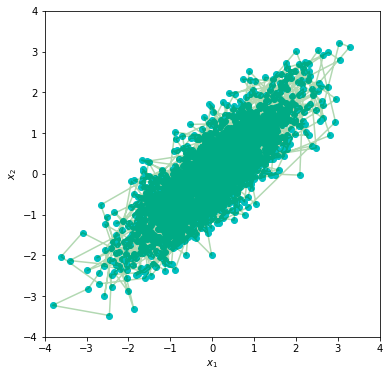

In [2]:
def gibbsUpdate(x, mu, rho):
    stdv = np.sqrt(1-rho**2)
    newx = np.zeros(x.shape)
    m0 = mu[0] + rho*(x[1]-mu[1])
    newx[0] = np.random.normal(m0, stdv)
    m1 = mu[1] + rho*(newx[0]-mu[0])
    newx[1] = np.random.normal(m1, stdv)
    return newx


def driver(x0, nsteps=5000, mu=np.zeros((2,1)), rho = 0.8):
    x = np.zeros((nsteps,2))
    # initial state
    x[0,:] = x0.reshape(1,2)
    # main loop
    for i in range(1,nsteps):
        newx = gibbsUpdate(x[i-1,:], mu, rho)
        x[i,:] = newx.reshape(1,2)
    return x
x0 = np.array([1,1])
x = driver(x0, nsteps=2000, mu=np.zeros((2,1)), rho = 0.8)
#print(x)

fig = plt.figure(figsize=(6,6))
x_1 = x[:,0]
x_2 = x[:,1]
plt.scatter(x_1,x_2, color='c',marker='o')
plt.plot(x_1,x_2, linestyle='-',color='g', alpha=0.3)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-4., 4.) 
plt.ylim(-4., 4.)
plt.show()

## <font color= teal>Applying Multinomial Naive Bayes to NLP Problem</font>
## <font color= Orange>A Simple Example :</font>
Source: https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/

In **Naive Bayes classifiers**, every feature is independent of the others in order to **predict the category of a given sample**. 
Will calculate the probability of each category using Bayes theorem, and the category with the highest probability will be output. 
 <br>
 - we are given a sentence **“ A very close game”**.
 - a **training set of five sentences**, and their corresponding **category (Sports or Not Sports)**. 
 - The goal is to build a Naive Bayes classifier that will tell us which category the sentence “ A very close game” belongs to. 


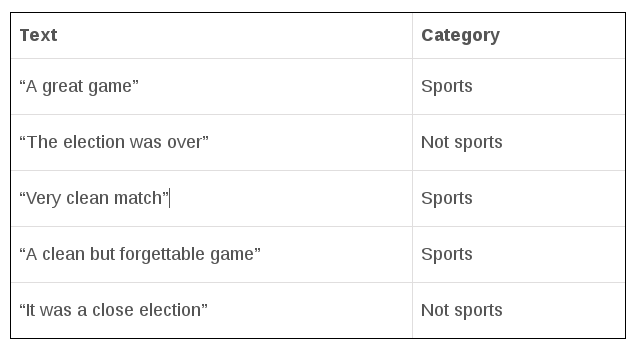

In [3]:
Image("naive1.png", width = 500, height = 200)

### <font color= orange>Step 1: Feature Engineering</font>

We need **numerical features of text** as input. A good choice would be **word frequencies**, i.e., counting the occurrence of every word in the document. 
 Then, we need to convert the probability that we wish to calculate into a form that can be calculated using word frequencies.  
 **Bayes’ Theorem** is useful to do the conversion, dealing with conditional probabilities.
 
 $$
P(A | B)=\frac{P(B | A) \times P(A)}{P(B)}\\
$$

In our case:
$$
P(\textit{sporst}\,\mid \,\textit{a very close game})=\frac{P(\textit{a very close game}\,\mid \,\textit{sports}) \times P(\textit{sports})}{P(\textit{a very close game})}\\
$$

Because we are only trying to **find out which category (Sports or Not Sports) has a higher probability**, it makes sense to discard the divisor P(a very close game), and compare only:

$$
{P(\textit{a very close game}\,\mid \,\textit{Sports}) \times P(\textit{Sports})}\\
\text{with}\\
{P(\textit{a very close game}\,\mid \,\textit{Not Sports}) \times P(\textit{Not Sports})}\\
$$

But **we have a problem:**
<br>
The occurrence of **“a very close game”** in the Sports category is zero, leading to $P(\textit{a very close game}\,\mid \,\textit{Sports})=0$.  


### <font color= orange>Step 2: Being naive</font>

 - In **non-naive Bayes :** we look at sentences in entirety. Then, when the sentence does not show up in the training set, we will get a zero probability that is problematic, because it will remove all the information in the other probabilities.
 
 - In **Naive Bayes :** there is an assumption that every word is independent of one another. Now, we look at individual words instead of the entire sentence:
 
<br>
$
P(\textit{a very close game}\mid\textit{Sports}) = P(\textit{a}\mid\textit{Sports}) \times P(\textit{very}\mid\textit{Sports})\times P(\textit{close}\mid\textit{Sports}) \times P(\textit{game}\mid\textit{Sports})\\
$

$
P(\textit{a very close game}\mid\textit{Not Sports}) = P(\textit{a}\mid\textit{Not Sports}) \times P(\textit{very}\mid\textit{Not Sports})\times P(\textit{close}\mid\textit{Not Sports}) \times P(\textit{game}\mid\textit{Not Sports})\\
$

### <font color= orange>Step 3: Calculating the probabilities</font>

But **we have a problem:**
<br>
The occurrence of word **“close”** in Sports category is zero, , leading to $P(\textit{close}\,\mid \,\textit{Sports})=0$, then $P(\textit{a very close game}\,\mid \,\textit{Sports})=0$.

The solution is **Laplace smoothing**.
### <font color= orange>Laplace smoothing :</font>
Source: https://en.wikipedia.org/wiki/Additive_smoothing
<br>

Laplace smoothing is a technique for smoothing categorical data. A small-sample correction, or **pseudocount**, will be **added to each observation**.
Then, **no probability will be zero** :

Given **an observation** $x_i$, and its frequency of $x_i^f$, define the vector $\theta_i$, as the **"smoothed" version** of the data:

$$
\theta_i = \frac{x_i^f+\alpha}{N+\alpha d} \quad (i=1,...,d)
$$

where:
<br>
N  is the number of trials
<br>
$\alpha > 0$ is the **smoothing parameter** ($\alpha = 0$
corresponds to no smoothing). some authors have argued that **α
should be 1**. 
<br>
$d$ is the **number of possible words in two categories**.

<br>

In our case, we have the smoothed data as below:
<br>
number of possible words = 14
<br>
number of words in "sports" = 11
<br>
number of words in "Not sports" = 9
<br>
**Prior probability of each category**: for a given sentence in our training data,  $P(\textit{Sports}) = 3/5$ and $P(\textit{Not Sports}) = 2/5$

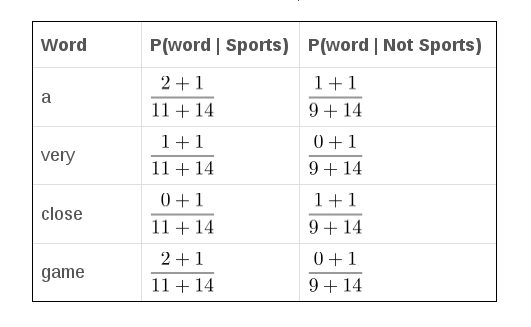

In [4]:
Image("naive2.png", width = 450, height = 200)

### <font color= orange>Step 4: Result</font>
As seen from the results shown below, $P(\textit{a very close game}\mid\textit{Sports})$ gives a higher probability, suggesting that **the sentence belongs to the Sports category**:

$
P(\textit{sporst}\,\mid \,\textit{a very close game})\sim
P(\textit{a very close game}\mid\textit{Sports})\times P(\textit{Sports}) \\
= P(\textit{a}\mid\textit{Sports}) \times P(\textit{very}\mid\textit{Sports})\times P(\textit{close}\mid\textit{Sports}) \times P(\textit{game}\mid\textit{Sports})\times P(\textit{Sports})\\
= 2.76 \times 10^{-5} = 0.0000276
$

$
P(\textit{Not sporst}\,\mid \,\textit{a very close game})\sim
P(\textit{a very close game}\mid\textit{Not Sports})\times P(\textit{Not Sports}) \\
= P(\textit{a}\mid\textit{Not Sports}) \times P(\textit{very}\mid\textit{Not Sports})\times P(\textit{close}\mid\textit{Not Sports})\times P(\textit{game}\mid\textit{Not Sports})\times P(\textit{Not Sports}) \\
= 0.572 \times 10^{-5} = 0.00000572\\
$

<br>


# <font color= teal> Application : Finding scientific topics</font>
Source: http://www.pnas.org/content/101/suppl_1/5228

A scientific paper can deal with **multiple topics**. 
<br>

The **words** that appear in that paper reflect the particular set of topics. 
In **statistical natural language processing**, treat each topic as a probability distribution over
words, and a document as a probabilistic mixture of these topics. 
<br>

If we have **T topics**, we can write the **probability of the $i^{th}$ word in a given document** as:
$$
P(w_i) = \sum_{j=1}^{T}{P(w_i \mid z_i = j) P(z_i = j)}
$$
where :
<br>
$ z_i $ : is a latent variable indicating the topic from which the
ith word was drawn.
<br>
$ P(w_i \mid z_i = j)$ : is the probability of the word $w_i$ under the $j^{th}$ topic.
<br>
$ P(z_i = j) $ : is the probability of choosing a word from topics $j$ in the current document, which will vary across different documents.

<br>

Given **$D$ documents** containing **$T$ topics** expressed over **$W$ unique words**, we can represent the following for word $w$ in a document $d$:
<br>

$ P(w \mid z = j) = \phi_w^{(j)}$ 
<br>
$ P( z = j) = \theta_j^{(d)}$ 

<br>

**The Goal :**
To discover the set of topics used in a **corpus $w =\{w_1 , w_2 , . . . , w_n \}$**, where each $w_i$ belongs to some document $d_i$ , we want **to obtain an estimate of $ \phi $ that gives high probability** to the words that appear in the corpus.


## <font color= orange>Using Gibbs Sampling to Discover Topics</font>

The strategy for discovering is to use the **posterior distribution $ P(z \mid w)$**.
<br>

Evaluating $ P(z \mid w)$ requires **Bayesian statistics**,
computing a probability distribution over a large discrete state
space. We address this problem by using a **Monte Carlo procedure**.

The goal is to evaluate the posterior distribution:
$$ P(z \mid w) = \frac{P(w,z)}{\sum_{z}{P(w,z)}} $$

This distribution cannot be computed directly, because the sum in the denominator involves **$T^n$ terms**, where $n$ is the total number of words in the corpus.
<br>
To solve these problems, the method is **sampling from the
target distribution by using Markov chain Monte Carlo**.
 

**Use Gibbs sampling** , where the next state is reached by sampling all variables from their distribution when
conditioned on the current values of all other variables and the data. 
<br>

To apply this algorithm we need the **full conditional distribution $P(z_i\,\mid\,Z_{-i} , w)$**. This distribution can be obtained as below :

$$P(z_i=j\,\mid\,Z_{-i} , w) \propto \frac{n_{-i,j}^{(w_i)} +\beta}{n_{-i,j}^{(.)} + W\beta}\,\,\frac{n_{-i,j}^{(d_i)} +\alpha}{n_{-i,.}^{(d_i)} + T\alpha}$$

 - the **first ratio** expresses the probability of $w_i$ under topic $j$ (Estimate of $\phi_w^{(j)}$).
 <br>
 
 - the **second ratio** expresses the probability of topic $j$ in document $d_i$ (Estimate of $\theta_j^{(d)}$).
 <br>
 
 - $n_{-i,j}^{(w_i)}$ is the number of times a word $w_i$ is assigned to topic $z_j$ 
 <br>
 
 - $n_{-i,j}^{(.)}$ is the total number of words assigned to topic $z_j$
  <br>
  
 - $n_{-i,j}^{(d_i)}$ is the number of times a word in document $d_i$ is assigned to topic $z_j$ 
 <br>
 
 - $n_{-i,.}^{(d_i)}$ is the total number of words in document $d_i$
 <br>
 
 - $\alpha$ and $\beta$ are Dirichlet Smoothing parameters, to make sure no probability will be zero. 
 
<br>

Having all full conditional distribution, the Monte Carlo algorithm (Gibbs sampler) is easy to be applied. The $z_i$ variables are initialized to values in $\{1, 2, . . . , T\}$, as the initial state of the Markov chain. 
After enough iterations for the chain to approach the target distribution, the current values of the $z_i$ variables are recorded. 

<br>

With a set of samples from the posterior distribution $P(z\mid w)$, we can **estimate $\phi$ and $\theta$  for any single sample from the value z** by :
$$ \hat{\phi}_j^{(w)} = \frac{n_{j}^{(w)} +\beta}{n_{j}^{(.)} + W\beta} $$

$$ \hat{\theta}_j^{(d)} = \frac{n_{j}^{(d)} +\alpha}{n_{.}^{(d)} + T\alpha} $$
 
 ## <font color= orange>One proposed Application in the paper: 
    
Apply the algorithm to a **corpus consisting of abstracts (28,154) from PNAS from 1991 to 2001**, with each of these abstracts constituting a single document in the corpus. Use that to  **extract the set of topics**. And use these topics to illustrate the relationships between different scientific topics, and their trends to find **‘‘hot topics’’ **

<br>

### <font color= orange>Fig1 :
(Upper) Mean values of $\theta$ at each of the diagnostic topics for all 33 PNAS categories, computed by using all abstracts published in 2001. **Higher probabilities are indicated with darker cells**. 
<br>
(Lower) The **five most probable words in the topics** listed in the same order as on the horizontal axis in
Upper.

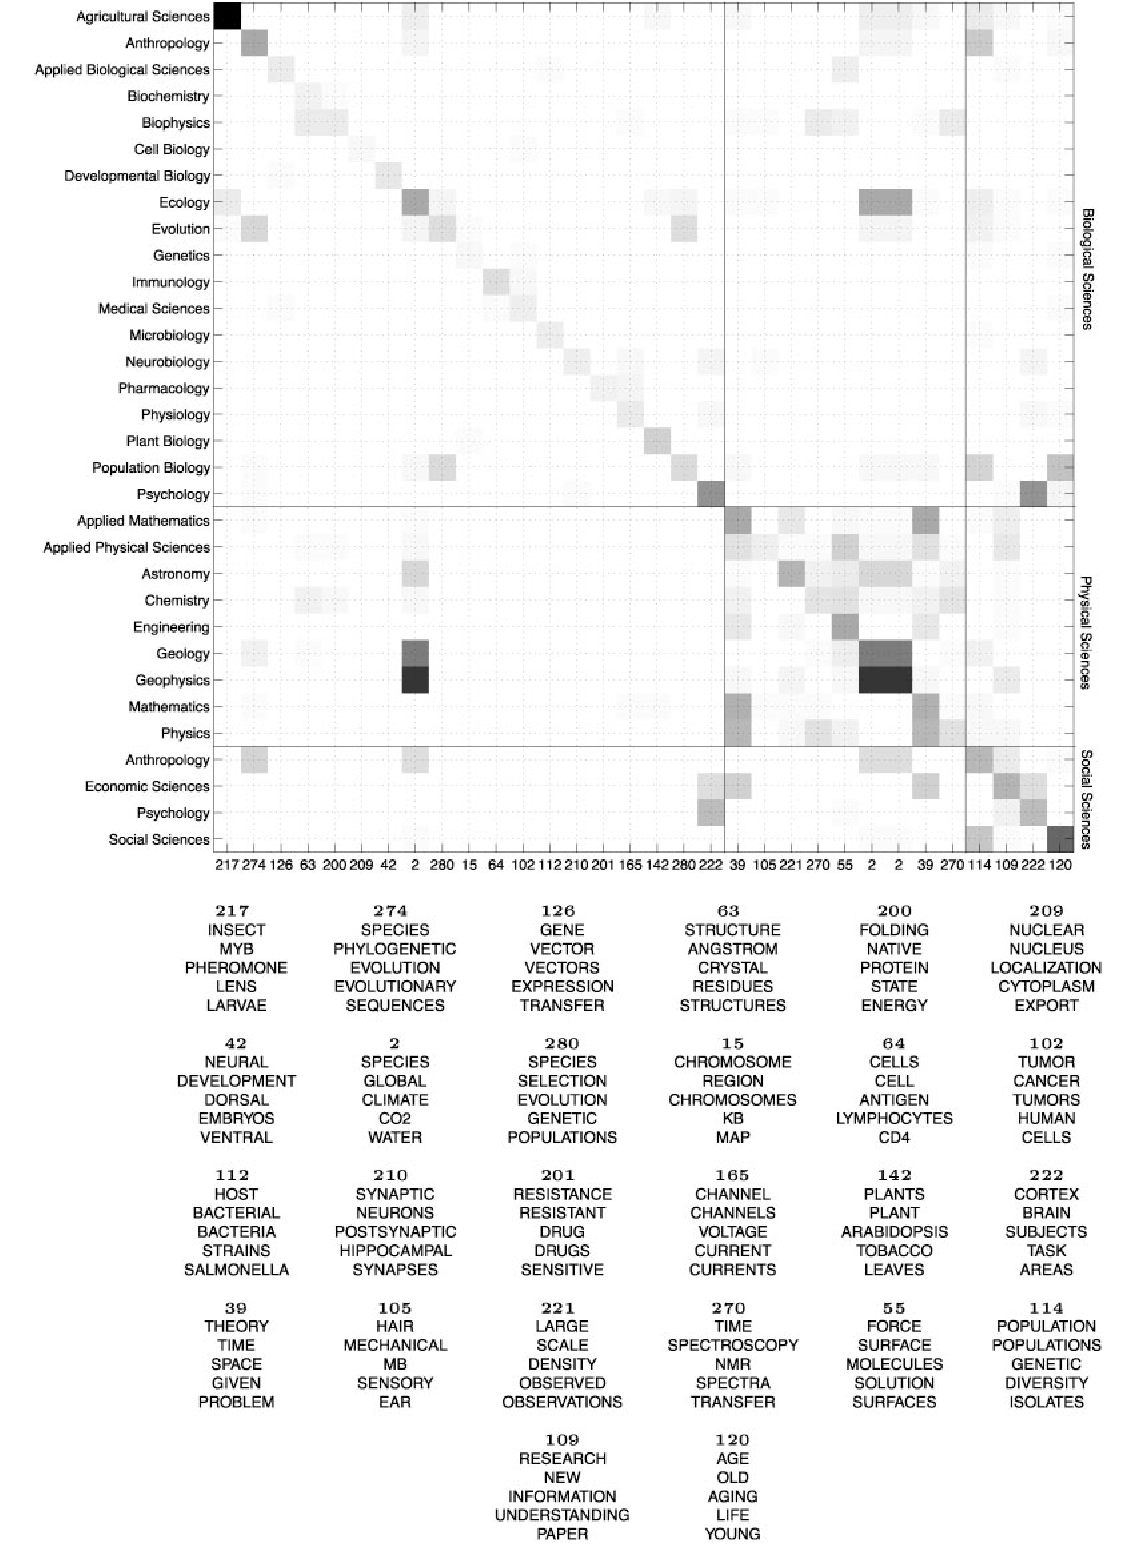

In [5]:
Image("Fig1.png", width = 700, height = 500)

### <font color= orange>Fig2 :
(Upper) The plots show the dynamics of the **three hottest and three coldest topics from 1991 to 2001**, defined as those topics that showed the strongest positive and negative linear trends. 
<br>
(Lower)The **12 most probable words in those topics** are shown below the plots.

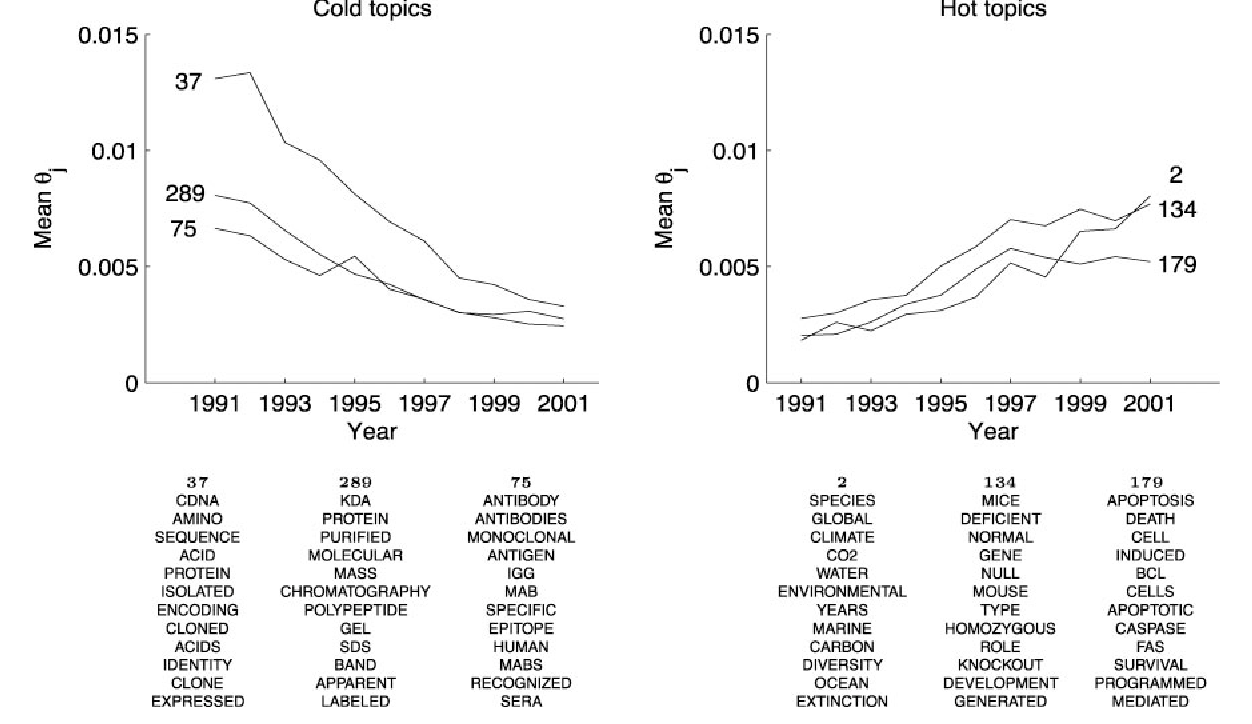

In [6]:
Image("Fig2.png", width = 800, height = 600)

## <font color= teal> References</font>

 1. Griffiths, Thomas L., and Mark Steyvers. "Finding scientific topics." Proceedings of the National academy of Sciences 101.suppl 1 (2004): 5228-5235.
 http://www.pnas.org/content/101/suppl_1/5228
 
 2. Cohen, Shay. "Bayesian analysis in natural language processing." Synthesis Lectures on Human Language Technologies 9.2 (2016): 1-274.
 
 3. https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/
 
 4. Dr. Sachin Shanbhag, (ISC5228-0001) Monte Carlo Methods, Spring 2018, Florida State University
